In [1]:
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import chess analysis functions
import chess_analyzer as chan

# best view options
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# ============================================================================
# EXAMPLE 1: API MODE - Fetch new data from chess.com and analyze
# ============================================================================
# This mode fetches games from the chess.com API, saves PGN files and CSV metadata,
# then analyzes each game and saves analysis results to CSV files.

print("=" * 80)
print("MODE 1: API MODE - Fetching and analyzing from chess.com API")
print("=" * 80)

# Fetch games from API and analyze them
# This will:
# 1. Fetch games from chess.com API
# 2. Save PGN files to 'games/' directory
# 3. Save games metadata to CSV: 'rosolimo_2025-11_games.csv'
# 4. Analyze each game with Stockfish
# 5. Save analysis results to CSV: '{game_id}_analysis.csv'

df_all_moves_api = chan.analyze_games_from_chess_com(
    username='rosolimo',
    date='2025-11-14',
    save_dir='games',
    is_verbose=True
)

print(f"\n✅ API Mode Complete!")
print(f"📊 Total moves analyzed: {len(df_all_moves_api)}")
print(f"🎮 Games analyzed: {df_all_moves_api['game_id'].nunique() if not df_all_moves_api.empty else 0}")

MODE 1: API MODE - Fetching and analyzing from chess.com API
STEP 1: FETCHING GAMES FROM CHESS.COM
Fetching games for rosolimo from 2025-11...
URL: https://api.chess.com/pub/player/rosolimo/games/2025/11
Found 84 games
  [1/84] Saved: rosolimo_2025-11_game_144982514786.pgn (ID: 144982514786)
  [2/84] Saved: rosolimo_2025-11_game_144982981296.pgn (ID: 144982981296)
  [3/84] Saved: rosolimo_2025-11_game_145059983558.pgn (ID: 145059983558)
  [4/84] Saved: rosolimo_2025-11_game_145072579938.pgn (ID: 145072579938)
  [5/84] Saved: rosolimo_2025-11_game_145072997604.pgn (ID: 145072997604)
  [6/84] Saved: rosolimo_2025-11_game_145077266392.pgn (ID: 145077266392)
  [7/84] Saved: rosolimo_2025-11_game_145078006968.pgn (ID: 145078006968)
  [8/84] Saved: rosolimo_2025-11_game_145078223510.pgn (ID: 145078223510)
  [9/84] Saved: rosolimo_2025-11_game_145102775840.pgn (ID: 145102775840)
  [10/84] Saved: rosolimo_2025-11_game_145103017688.pgn (ID: 145103017688)
  [11/84] Saved: rosolimo_2025-11_game_1

In [3]:
# ============================================================================
# EXAMPLE 2: FILE MODE - Load existing data from disk (CSV files)
# ============================================================================
# This mode loads previously analyzed games from CSV files on disk.
# Much faster than re-analyzing, useful when you've already analyzed games.

print("=" * 80)
print("MODE 2: FILE MODE - Loading from existing CSV files")
print("=" * 80)

# Option A: Load games metadata from CSV, then load analysis from CSV files
# This is the fastest way - no API calls, no re-analysis
from pathlib import Path

# Load games metadata from CSV
games_csv_path = Path('games') / 'rosolimo_2025-11_games.csv'
if games_csv_path.exists():
    df_games_metadata = pd.read_csv(games_csv_path)
    print(f"✅ Loaded {len(df_games_metadata)} games from CSV")
    
    # Load analysis for each game from CSV files
    all_moves_data = []
    for idx, game_row in df_games_metadata.iterrows():
        game_id = game_row['game_id']
        pgn_path = game_row['pgn_path']
        
        # Try to load analysis from CSV
        df_moves = chan.analyze_pgn_evaluations(
            pgn_path,
            data_dir='games'  # Will load from CSV if exists
        )
        
        if not df_moves.empty:
            # Add game metadata to each move row
            for col in df_games_metadata.columns:
                if col != 'pgn_path':
                    df_moves[col] = game_row[col]
            all_moves_data.append(df_moves)
    
    if all_moves_data:
        df_all_moves_file = pd.concat(all_moves_data, ignore_index=True)
        print(f"✅ File Mode Complete!")
        print(f"📊 Total moves loaded: {len(df_all_moves_file)}")
        print(f"🎮 Games loaded: {df_all_moves_file['game_id'].nunique()}")
    else:
        df_all_moves_file = pd.DataFrame()
        print("⚠️  No analysis CSV files found")
else:
    print("⚠️  Games metadata CSV not found. Run API mode first.")
    df_all_moves_file = pd.DataFrame()

# Option B: Use analyze_games_from_chess_com with data_dir
# This will still try to fetch from API, but will load analysis from CSV if available
# df_all_moves_file = chan.analyze_games_from_chess_com(
#     username='rosolimo',
#     date='2025-11-15',
#     save_dir='games',
#     data_dir='games',  # Specify where to look for CSV files
#     is_verbose=True
# )


MODE 2: FILE MODE - Loading from existing CSV files
✅ Loaded 84 games from CSV
✅ File Mode Complete!
📊 Total moves loaded: 6890
🎮 Games loaded: 84


In [4]:
# ============================================================================
# EXAMPLE 3: Analyze single game - API mode vs File mode
# ============================================================================

# Option A: Analyze single game (will analyze with Stockfish)
pgn_path = 'games/rosolimo_2025-11_game_145613281378.pgn'
df_eval_new = chan.analyze_pgn_evaluations(
    pgn_path,
    data_dir='games'  # Will save to CSV after analysis
)

# Option B: Load single game from CSV (if already analyzed)
df_eval_loaded = chan.analyze_pgn_evaluations(
    pgn_path,
    data_dir='games'  # Will load from CSV if exists
)

print(f"Analyzed game: {len(df_eval_loaded)} moves")


Analyzed game: 102 moves


In [5]:
# Display sample of the analysis data
df_eval_loaded.sample(3)

,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion
66,66,33,Black,Rd3+,-651,-6.51,0.18,normal,endgame,49.1,161.0,196.9,85.0,2.6,7,9,-2,2,4,False,0,0,0,0,0,2,0,4,False,False,10,12,0,0,False,False
15,15,8,White,cxd5,46,0.46,-0.18,normal,opening,168.0,181.6,28.0,12.4,11.0,36,35,1,8,7,False,0,0,1,0,0,0,4,3,False,False,2,1,0,0,True,False
36,36,18,Black,Rhe8+,-48,-0.48,-0.55,inaccuracy,middlegame,159.4,183.1,56.6,32.9,2.0,18,18,0,5,5,True,2,0,0,0,1,0,2,4,False,False,7,7,0,0,False,False


In [6]:
len(df_eval_loaded)

102

<Axes: xlabel='move_number'>

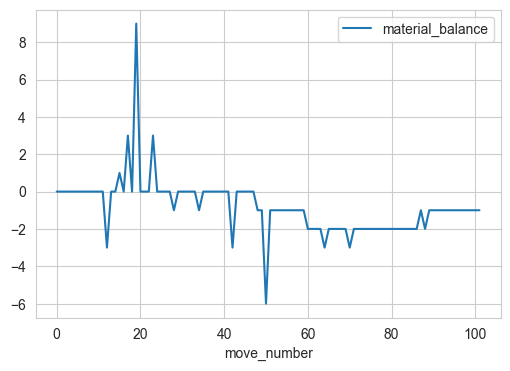

In [ ]:
# Plot material balance over moves
if not df_eval_loaded.empty:
    df_eval_loaded.set_index('move_number')[['material_balance']].plot(figsize=(6, 4))
    plt.title('Material Balance Over Moves')
    plt.ylabel('Material Balance (White - Black)')
    plt.xlabel('Move Number')
    plt.show()

<Axes: xlabel='move_number'>

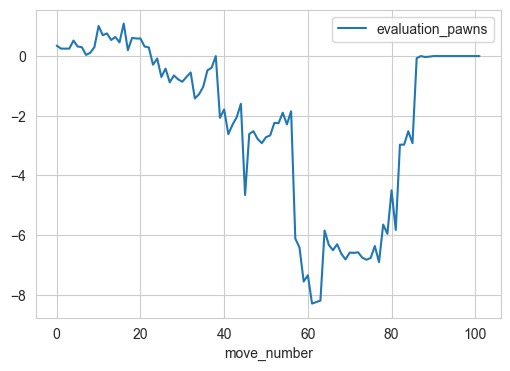

In [ ]:
# Plot evaluation over moves
if not df_eval_loaded.empty:
    df_eval_loaded.set_index('move_number')[['evaluation_pawns']].plot(figsize=(6, 4))
    plt.title('Position Evaluation Over Moves')
    plt.ylabel('Evaluation (pawns, relative to White)')
    plt.xlabel('Move Number')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    plt.show()

<Axes: xlabel='move_number'>

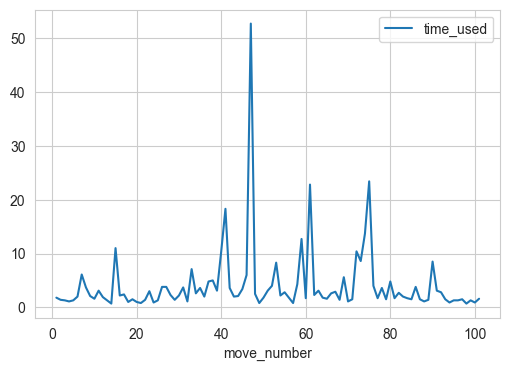

In [ ]:
# Plot time usage over moves
if not df_eval_loaded.empty and 'time_used' in df_eval_loaded.columns:
    df_eval_loaded.set_index('move_number')[['time_used']].plot(figsize=(6, 4))
    plt.title('Time Used Per Move')
    plt.ylabel('Time (seconds)')
    plt.xlabel('Move Number')
    plt.show()

In [ ]:
# ============================================================================
# EXAMPLE 4: Analysis of move quality across all games
# ============================================================================

# Analyze move quality by player, game phase, and move type
if not df_all_moves_file.empty:
    move_quality = df_all_moves_file.groupby(['player', 'game_phase', 'move_type']).agg(
        moves=('move_number', 'nunique'),
    ).reset_index()
    
    print("Move Quality Analysis:")
    print(move_quality)
    
    # Pivot for better visualization
    pivot = move_quality.pivot_table(
        index=['player', 'game_phase'],
        columns='move_type',
        values='moves',
        fill_value=0
    )
    print("\nPivot Table:")
    print(pivot)


,player,game_phase,move_type,moves
0,Black,endgame,blunder,4
1,Black,endgame,mistake,2
2,Black,endgame,normal,23
3,Black,middlegame,inaccuracy,1
4,Black,middlegame,normal,10
5,Black,opening,inaccuracy,2
6,Black,opening,normal,8
7,Start,opening,normal,1
8,White,endgame,blunder,2
9,White,endgame,inaccuracy,2


# Chess Game Analysis Tool

This notebook demonstrates two working modes:

## Mode 1: API Mode
- Fetches games from chess.com API
- Saves PGN files and CSV metadata
- Analyzes games with Stockfish engine
- Saves analysis results to CSV files

## Mode 2: File Mode  
- Loads games metadata from existing CSV files
- Loads analysis results from CSV files (if available)
- Much faster - no re-analysis needed
- Falls back to analysis if CSV doesn't exist

## Key Functions:
- `fetch_chess_com_games()` - Fetch games from API, save PGN and CSV
- `analyze_pgn_evaluations()` - Analyze single game, save/load from CSV
- `analyze_games_from_chess_com()` - Fetch and analyze all games, supports both modes


In [14]:
df_eval[
            (df_eval['player'] == 'Black') &
            (df_eval['move_type'] == 'blunder')
        ]


,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion
46,46,23,Black,Rea8,-261,-2.61,-2.05,blunder,endgame,137.8,166.0,88.2,60.0,6.0,15,15,0,5,5,True,2,0,0,0,1,0,3,2,False,False,8,8,0,0,False,False
64,64,32,Black,hxg4+,-585,-5.85,-2.35,blunder,endgame,48.7,161.6,195.3,82.4,1.8,7,10,-3,2,5,False,2,0,0,1,0,2,1,4,False,False,9,12,0,0,True,False
82,82,41,Black,Rg7,-297,-2.97,-2.86,blunder,endgame,18.2,135.3,243.8,126.7,2.7,6,8,-2,1,3,False,1,1,0,0,1,3,1,1,False,False,11,13,0,0,False,False
86,86,43,Black,Rg5+,-7,-0.07,-2.85,blunder,endgame,18.7,133.8,247.3,132.2,3.8,6,8,-2,1,3,False,1,1,0,0,1,3,1,1,False,False,11,13,0,0,False,False
